In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.tsa.api as tsa
import os
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
os.chdir('D:\\Users\\Gebruiker\\Desktop\\Anita\'s rotzooi\\Tilburg University\\Master Year 1\\ComplexSystems')
data = pd.read_csv('paired_slopes_df.csv')

In [15]:
data

,participant_number,slope_adaptive,slope_random
0,22,0.020586,-0.028778
1,22,0.020586,-0.103144
2,22,0.020586,-0.066504
3,22,0.020586,0.047658
4,22,0.020586,-0.017935
...,...,...,...
20128,20,0.050753,-0.014364
20129,20,0.050753,-0.004137
20130,20,0.050753,-0.022715
20131,20,0.050753,0.053619


In [147]:
def getPeaks(data, condition):
    peopleNums = np.unique(data['participant_number'])
    peaklist = []
    peaklist2 = []
    
    
    for i in range(len(peopleNums)):
        participant = data.loc[data['participant_number'] == peopleNums[i]]
        autocorr = tsa.acf(participant['slope_{}'.format(condition)])
        
        corr = np.correlate(participant['slope_{}'.format(condition)], participant['slope_{}'.format(condition)], mode='full')
        
        peaks, _ = find_peaks(autocorr)
        peaklist.append(peaks)
        
        peaks2, _ = find_peaks(corr)
        peaklist2.append(peaks2)
        
    out = pd.DataFrame({'Participant': peopleNums, 'Peaks acf' : peaklist, 'Peaks autocorr' : peaklist2})
    
    return out, peaklist, peaklist2

df, peaklist1, peaklist2 = getPeaks(data, 'adaptive')


C:\Users\Gebruiker\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:657: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(
C:\Users\Gebruiker\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


In [148]:
df

,Participant,Peaks acf,Peaks autocorr
0,3,"[4, 10, 14, 22, 26, 30, 38]","[5, 9, 13, 19, 23, 27, 33, 45, 49, 57, 61, 67,..."
1,4,[],"[19, 79, 119, 179, 219, 259, 359, 399, 459, 49..."
2,5,[],"[44, 104, 149, 194, 269, 329, 359, 464, 569, 5..."
3,6,[],"[13, 83, 139, 195, 251, 307, 377, 405, 433, 50..."
4,7,[36],"[47, 83, 107, 143, 179, 215, 251, 275, 311, 34..."
5,8,[],"[59, 99, 139, 179, 259, 339, 399, 479, 519, 55..."
6,9,[],"[59, 99, 139, 259, 339, 399, 459, 539, 639, 73..."
7,10,[24],"[23, 47, 71, 119, 143, 179, 215, 239, 299, 323..."
8,11,[],"[95, 175, 255, 335, 383, 415, 447, 511, 591, 6..."
9,12,[36],"[23, 83, 107, 143, 179, 203, 227, 263, 287, 33..."


Text(0, 0.5, 'Frequency')

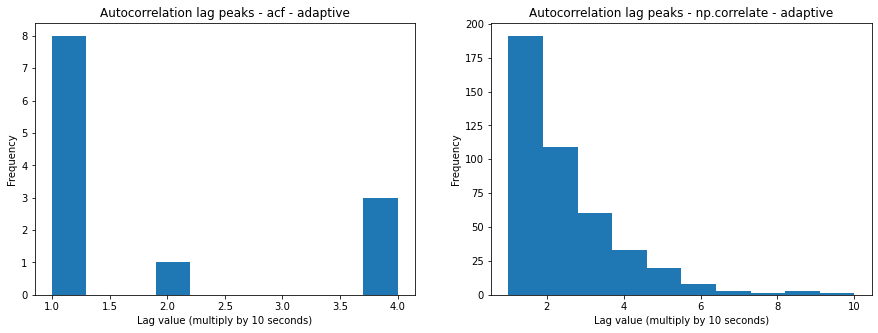

In [151]:

plt.figure(figsize = (15,5))
plt.subplot(1,2,1)

peakarr = np.array(peaklist1, dtype=object)
flat_arr = np.concatenate(peakarr)
peaksCount = np.unique(flat_arr, return_counts = True)
plt.hist(peaksCount[1]);
plt.title('Autocorrelation lag peaks - acf - adaptive')
plt.xlabel('Lag value (multiply by 10 seconds)')
plt.ylabel('Frequency')


plt.subplot(1,2,2)
peakarr = np.array(peaklist2, dtype=object)
flat_arr = np.concatenate(peakarr)
peaksCount = np.unique(flat_arr, return_counts = True)
plt.hist(peaksCount[1]);
plt.title('Autocorrelation lag peaks - np.correlate - adaptive')
plt.xlabel('Lag value (multiply by 10 seconds)')
plt.ylabel('Frequency')

